<a href="https://colab.research.google.com/github/ced-sys/Python-class/blob/main/Polynomial_regression_(test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
data=pd.read_csv('/content/geological_porosity_data.csv')

In [9]:
# Polynomial Regression Analysis
def polynomial_regression_analysis(X, y, max_degree=5):
    """
    Perform polynomial regression analysis with different degrees

    Parameters:
    - X: Input features (numpy array)
    - y: Target variable (numpy array)
    - max_degree: Maximum polynomial degree to test

    Returns:
    - DataFrame with model performance metrics
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Store results
    results = []

    # Plot setup
    plt.figure(figsize=(15, 10))
    plt.scatter(X, y, color='gray', alpha=0.5, label='Original Data')

    # Test different polynomial degrees
    for degree in range(1, max_degree + 1):
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly_train = poly_features.fit_transform(X_train_scaled)
        X_poly_test = poly_features.transform(X_test_scaled)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_poly_train)
        y_test_pred = model.predict(X_poly_test)

        # Compute metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2 = r2_score(y_test, y_test_pred)

        # Store results
        results.append({
            'Degree': degree,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'R-squared': r2
        })

        # Plot the polynomial regression curve
        # First, create a smooth line for plotting
        X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        X_plot_scaled = scaler.transform(X_plot)
        X_plot_poly = poly_features.transform(X_plot_scaled)
        y_plot = model.predict(X_plot_poly)

        plt.plot(X_plot, y_plot, label=f'Degree {degree}')

    # Finalize plot
    plt.xlabel('Depth (meters)')
    plt.ylabel('Porosity (%)')
    plt.title('Polynomial Regression: Depth vs Porosity')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nPolynomial Regression Model Performance:")
    print(results_df)

    return results_df


In [10]:
# Additional Feature Exploration
def feature_correlation_analysis(data):
    """
    Analyze correlations between features and porosity
    """
    # Select numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    # Compute correlation matrix
    correlation_matrix = data[numeric_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    import seaborn as sns
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # Print correlations with porosity
    print("\nCorrelations with Porosity:")
    print(correlation_matrix['porosity'].sort_values(ascending=False))


In [11]:
# Multivariate Polynomial Regression
def multivariate_polynomial_regression(data, features, target, degree=3):
    """
    Perform multivariate polynomial regression

    Parameters:
    - data: DataFrame
    - features: List of feature column names
    - target: Target column name
    - degree: Polynomial degree

    Returns:
    - Regression model and performance metrics
    """
    # Prepare the data
    X = data[features]
    y = data[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train_scaled)
    X_poly_test = poly_features.transform(X_test_scaled)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions and metrics
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    print("\nMultivariate Polynomial Regression Results:")
    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"R-squared: {r2}")

    return model, (train_rmse, test_rmse, r2)

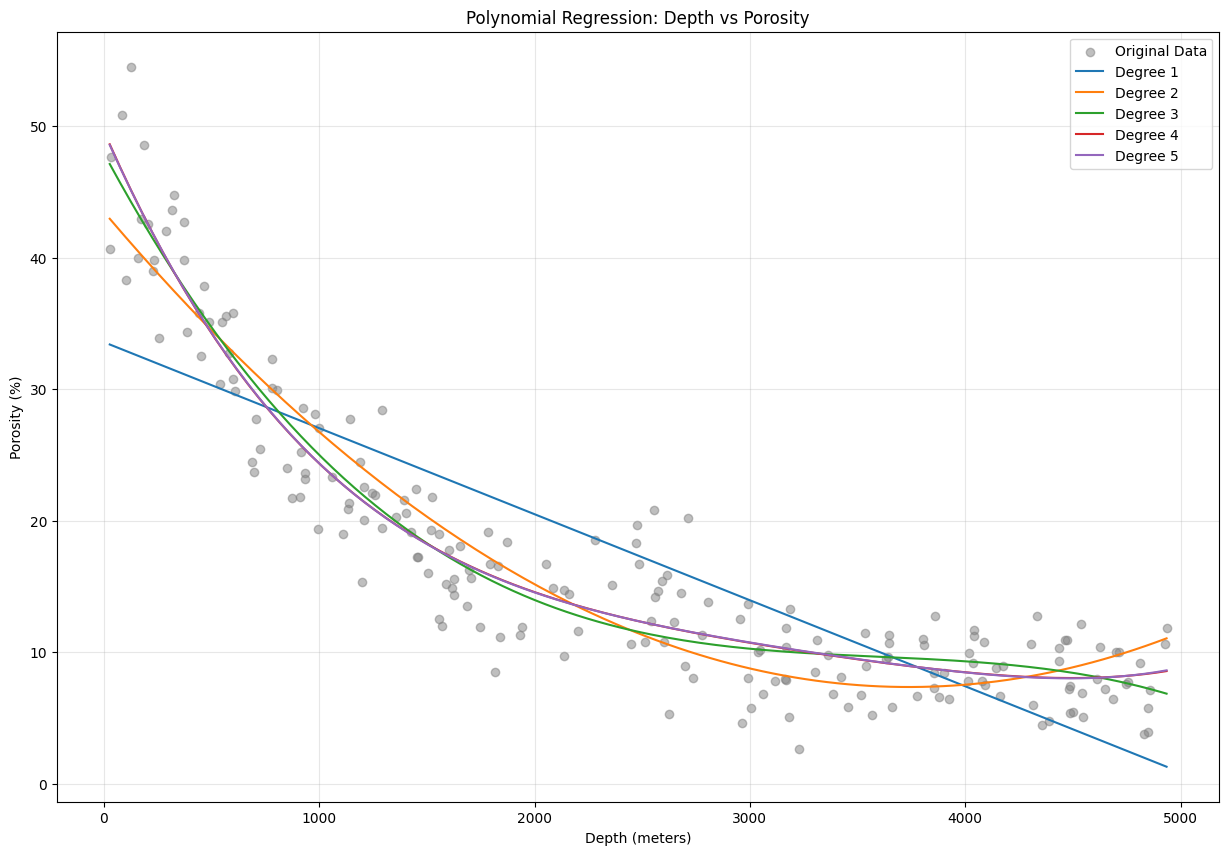


Polynomial Regression Model Performance:
   Degree  Train RMSE  Test RMSE  R-squared
0       1    6.053487   5.817391   0.653411
1       2    3.710414   3.888612   0.845137
2       3    3.242994   3.558024   0.870349
3       4    3.179296   3.493846   0.874984
4       5    3.179236   3.495105   0.874894


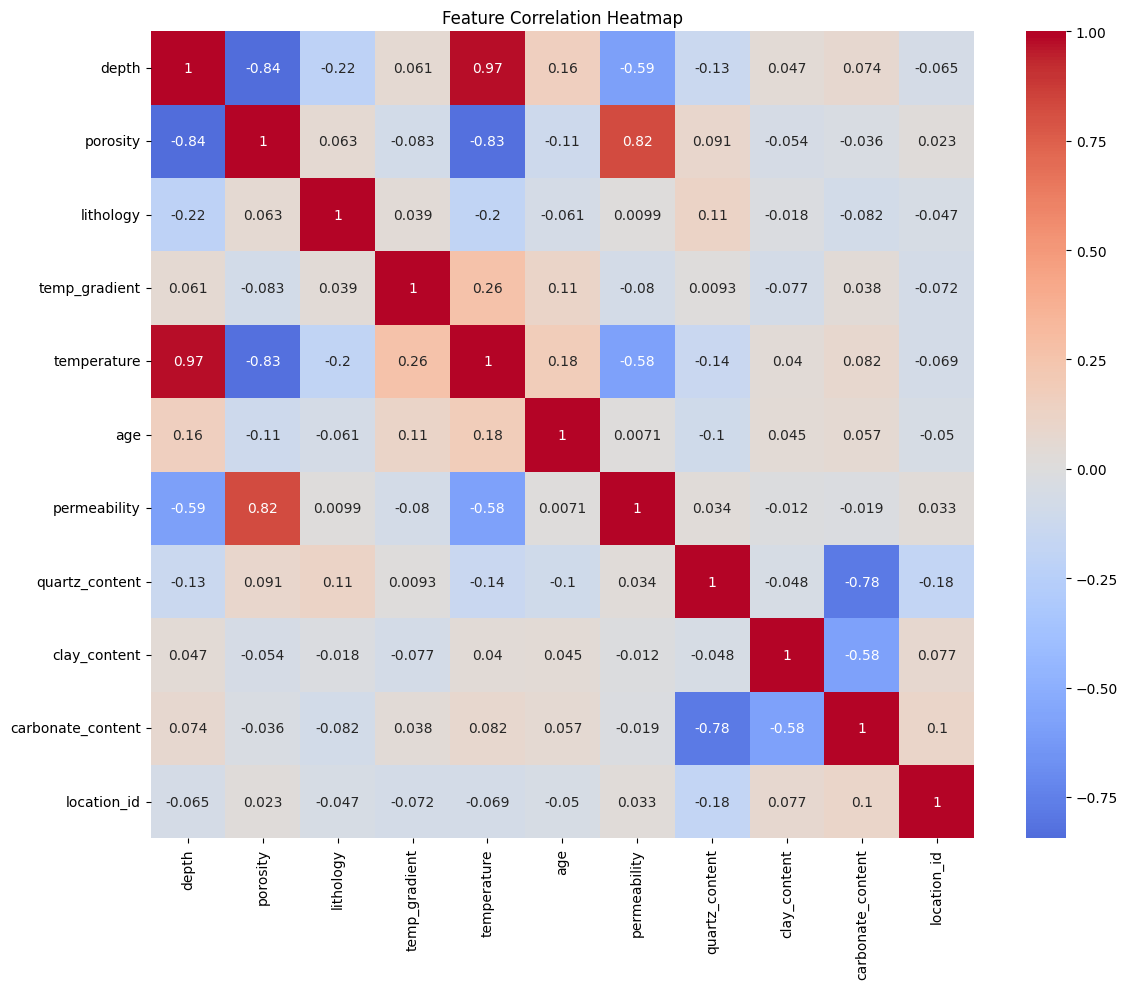


Correlations with Porosity:
porosity             1.000000
permeability         0.821143
quartz_content       0.091122
lithology            0.062775
location_id          0.022813
carbonate_content   -0.035510
clay_content        -0.053771
temp_gradient       -0.083438
age                 -0.109980
temperature         -0.827252
depth               -0.844646
Name: porosity, dtype: float64

Multivariate Polynomial Regression Results:
Train RMSE: 2.437221710491365
Test RMSE: 4.698860458744014
R-squared: 0.7738775487441004


In [12]:
# Main execution
if __name__ == "__main__":
    # Univariate Polynomial Regression (Depth vs Porosity)
    X = data['depth'].values.reshape(-1, 1)
    y = data['porosity'].values

    # Perform polynomial regression analysis
    univariate_results = polynomial_regression_analysis(X, y)

    # Feature correlation analysis
    feature_correlation_analysis(data)

    # Multivariate Polynomial Regression
    multivariate_features = ['depth', 'temp_gradient', 'age', 'quartz_content', 'clay_content']
    multivariate_model, multivariate_metrics = multivariate_polynomial_regression(
        data,
        features=multivariate_features,
        target='porosity',
        degree=3
    )

# Save the results for potential further analysis
univariate_results.to_csv('univariate_polynomial_regression_results.csv', index=False)